#Import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#Import dataset

In [ ]:
df = pd.read_csv('Mark.txt', header = None)
df = df.rename(columns={2:"accepted",1:"test 2",0:"test 1"})
df.head()

,test 1,test 2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#Set dependent and independent variable

In [ ]:
X = df.iloc[:, :-1]    # independent varible
y = df.iloc[:, -1]     # dependent variable

# Data standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

# standarisasi data dilakukan agar data lebih mudah diolah
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]
 [-1.06199728 -0.5357394 ]
 [-0.23437234  1.63818413]
 [ 0.4845113  -1.06373024]
 [ 0.53998666  1.14651105]
 [ 0.97044832 -1.22709853]]


#Splitting Dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

#Spliting Dataset with 20% test size
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Gaussian Naive Bayes using Scikitlearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

#Checking result

In [ ]:
data_check = pd.DataFrame({
    'Ground Truth': y_test,
    'Prediction': y_pred
})
data_check

,Ground Truth,Prediction
31,1,1
84,1,1
34,0,0
19,1,1
99,1,1
56,1,1
61,0,0
2,0,0
25,1,1
40,1,1


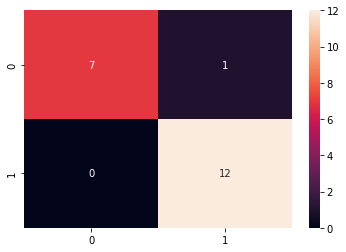

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



Jika kita membandingkan error yang ada pada nomor 3 dan nomor 4, terdapat jumlah error yang sama